# **Handwritten Digit Recognition System**

-------------

## **Objective**

  The objective of this project is to build a machine learning model that can accurately recognize handwritten digits (0-9) from images. This system will use a dataset of labeled images of digits to train the model, which will then be tested on unseen data.

## **Data Source**

I'll use the MNIST dataset, which is a large database of handwritten digits commonly used for training various image processing systems. It contains 60,000 training images and 10,000 test images.

## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


## **Import Data**

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


## **Describe Data**

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


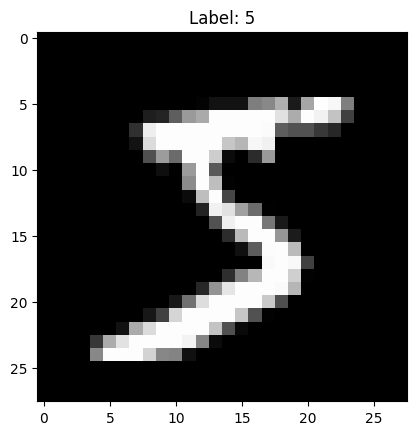

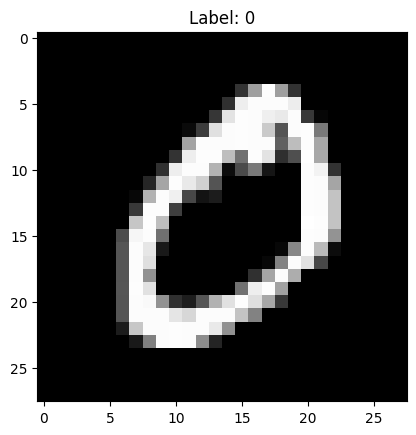

In [ ]:
# Check the shape of the data
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

# Display the first few training images and labels
for i in range(2):
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.show()


## **Data Visualization**

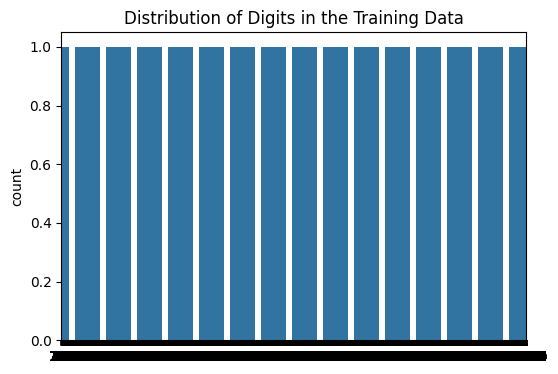

In [ ]:
# Plot the distribution of labels in the training data
plt.figure(figsize=(6,4))
sns.countplot(y_train)
plt.title("Distribution of Digits in the Training Data")
plt.show()


## **Data Preprocessing**

In [ ]:
# Normalize the image data to the range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to include the channel dimension (for CNN input)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## **Train Test Split**

In [ ]:
# Although the dataset is already split into train and test, we could further split the training data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## **Modeling**

In [ ]:
# Build a CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data for the fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.8170 - loss: 0.6683 - val_accuracy: 0.9719 - val_loss: 0.0939
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.9746 - loss: 0.0811 - val_accuracy: 0.9822 - val_loss: 0.0625
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 44s 175ms/step - accuracy: 0.9841 - loss: 0.0491 - val_accuracy: 0.9871 - val_loss: 0.0438
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 79s 162ms/step - accuracy: 0.9881 - loss: 0.0390 - val_accuracy: 0.9851 - val_loss: 0.0489
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 165ms/step - accuracy: 0.9902 - loss: 0.0337 - val_accuracy: 0.9884 - val_loss: 0.0392
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9887 - val_loss: 0.0364
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - accuracy: 0.9943 - loss: 0.0189 - val_accuracy: 0.9879 - val_loss: 0.0414
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - accuracy: 0.9954 - loss: 0

## **Model Evaluation**

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Generate a classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9848 - loss: 0.0469
Test Accuracy: 98.94%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.97      1.00      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## **Prediction**

In [ ]:
# Predict a single image
sample_image = X_test[0].reshape(1, 28, 28, 1)
predicted_label = model.predict(sample_image)
print(f"Predicted Label: {np.argmax(predicted_label)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Label: 7


## **Explaination**

1. Objective: The goal is to create a model that can recognize and classify handwritten digits (0-9) from images.

2. Data Source: We use the MNIST dataset, which contains 70,000 labeled images of handwritten digits. It is divided into 60,000 images for training and 10,000 for testing.

3. Import Libraries: We load essential libraries like NumPy, Pandas, Matplotlib, and Keras. These tools help with data manipulation, visualization, and building the neural network model.

4. Import Data: We load the MNIST dataset, which gives us the training and testing data. The data is split into features (images) and labels (digits).

5. Describe Data: We explore the dataset by checking the dimensions and visualizing some sample images with their corresponding digit labels.

6. Data Visualization: We visualize the distribution of digit labels in the training set to ensure the dataset is balanced.

7. Data Preprocessing: The images are normalized to a range of 0-1 to improve model performance, reshaped to fit the CNN input format, and the labels are one-hot encoded for the model's output.

8. Define Variables: X_train and X_test are the feature variables (image data), while y_train and y_test are the target variables (digit labels).

9. Train-Test Split: We further split the training data into a smaller training set and a validation set to tune the model before final testing.

10. Modeling: We build a Convolutional Neural Network (CNN) with two convolutional layers, followed by fully connected layers. The model is compiled and trained using the training and validation data.

11. Model Evaluation: The model's performance is evaluated on the test data, providing accuracy metrics and a detailed classification report.

12. Prediction: We demonstrate the model's ability to predict the digit for a single test image.

We discuss the model's performance, potential improvements, and ideas for future work, like using more advanced models or optimizing hyperparameters.



